<a href="https://colab.research.google.com/github/dornercr/DSCI631/blob/main/wk3_Regularization_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up

In [1]:
# Common imports
import numpy as np

# to make this notebook's output stable across runs
np.random.seed(42)

# plot set up
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Regularized models

In [2]:
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [3]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([1.55071465])

In [4]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([1.55072189])

In [5]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

In [6]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [7]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

# MNIST data

In [8]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [9]:
X, y = mnist["data"], mnist["target"]
X.shape, y.shape # each figure has 28x28 pixel

((70000, 784), (70000,))

In [10]:
X.loc[0]

,0
pixel1,0
pixel2,0
pixel3,0
pixel4,0
pixel5,0
...,...
pixel780,0
pixel781,0
pixel782,0
pixel783,0


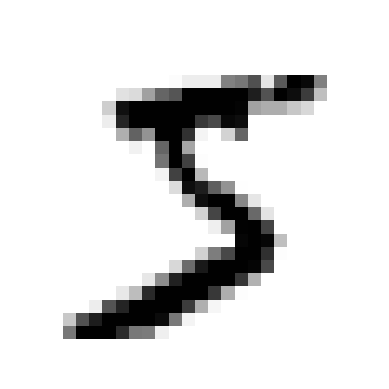

In [11]:
plt.imshow(np.array(X.iloc[0]).reshape(28,28), cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

In [12]:
y[0]  # string type
y = y.astype(np.uint8)

In [13]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Binary Classification

In [14]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [15]:
# Use Logstic Regression for binary classification
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression()
logR.fit(X_train, y_train_5)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

test the classifier on one instance in test set.

In [16]:
logR.predict([X_test.iloc[-2]]), y_test_5[69998]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


(array([ True]), np.True_)

Take a look at what the image look like

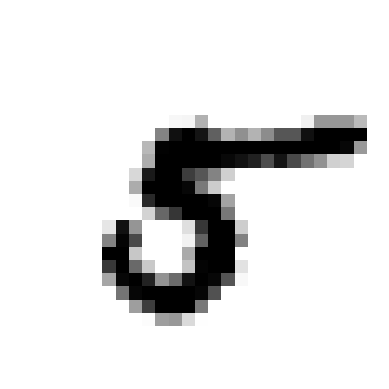

In [17]:
plt.imshow(np.array(X_test.iloc[-2]).reshape(28,28), cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

### Accuracy

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
accuracy_score(y_pred=logR.predict(X_train), y_true=y_train_5)

0.9778166666666667

In [20]:
# if all predict as not-5
accuracy_score(y_pred=np.zeros((len(X_train),1)), y_true=y_train_5)

0.90965

### Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [22]:
confusion_matrix(y_true=y_train_5, y_pred=logR.predict(X_train))

array([[54153,   426],
       [  905,  4516]])

In [23]:
# suppose all predictions are correct
confusion_matrix(y_true=y_train_5, y_pred=y_train_5)

array([[54579,     0],
       [    0,  5421]])

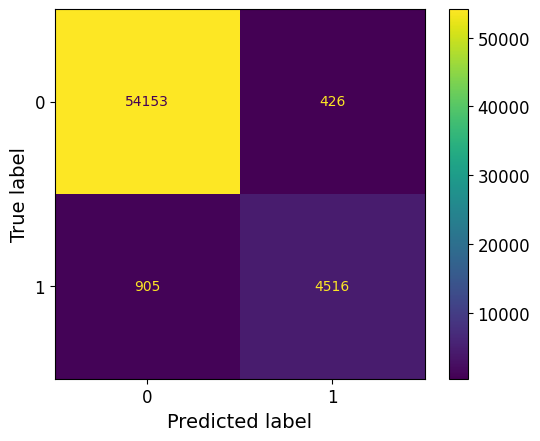

In [24]:
ConfusionMatrixDisplay(confusion_matrix(y_train_5, logR.predict(X_train), labels=logR.classes_)).plot()

### Precision & Recall

In [25]:
from sklearn.metrics import precision_score, recall_score

In [26]:
precision_score(y_pred=logR.predict(X_train), y_true=y_train_5)

0.9138000809388911

In [27]:
recall_score(y_pred=logR.predict(X_train), y_true=y_train_5)

0.8330566316177827

### F1 score

In [28]:
from sklearn.metrics import f1_score

f1_score(y_true=y_train_5, y_pred=logR.predict(X_train))

0.8715622889124771

### Precision/Recall Trade-off

In [29]:
logR.decision_function([X_test.iloc[-2]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([5.68543681])

In [30]:
# score is greater than threshold, then predict as True
threshold = 0
logR.decision_function([X_test.iloc[-2]]) > threshold

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([ True])

In [31]:
# raise threshold
threshold = 100
logR.decision_function([X_test.iloc[-2]]) > threshold

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([False])

In [32]:
y_train_scores = logR.decision_function(X_train)

from sklearn.metrics import precision_recall_curve

In [33]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_train_scores)

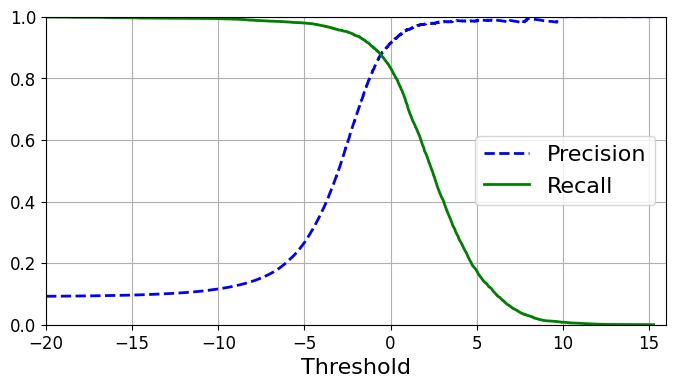

In [34]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    plt.axis([-20, 16, 0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.show()

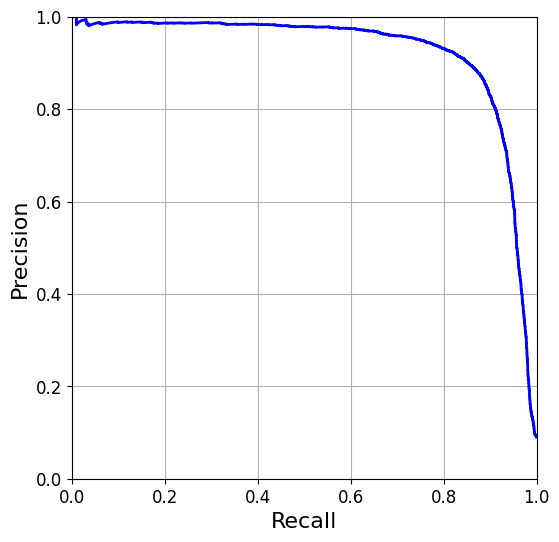

In [35]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(6, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

### ROC Curve

In [36]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_train_scores)

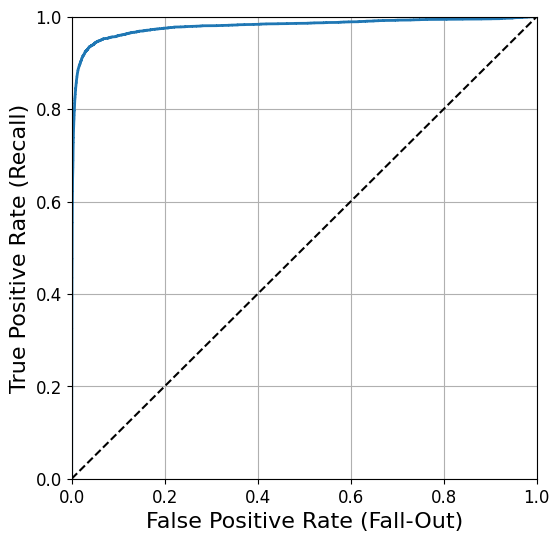

In [38]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

plt.figure(figsize=(6, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [39]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_train_scores)

np.float64(0.9792998989812375)

Compare ROC AUC of different algorithms

In [40]:
from sklearn.naive_bayes import GaussianNB

In [41]:
NB_clf = GaussianNB()
NB_clf.fit(X_train, y_train_5)

GaussianNB()

In [42]:
precision_score(y_pred=NB_clf.predict(X_test), y_true=y_test_5)

0.10431484115694642

In [43]:
recall_score(y_pred=NB_clf.predict(X_test), y_true=y_test_5)

0.9865470852017937

In [44]:
y_test_scores_nb = NB_clf.predict_proba(X_test)[:, 1]

In [45]:
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test_5, y_test_scores_nb)

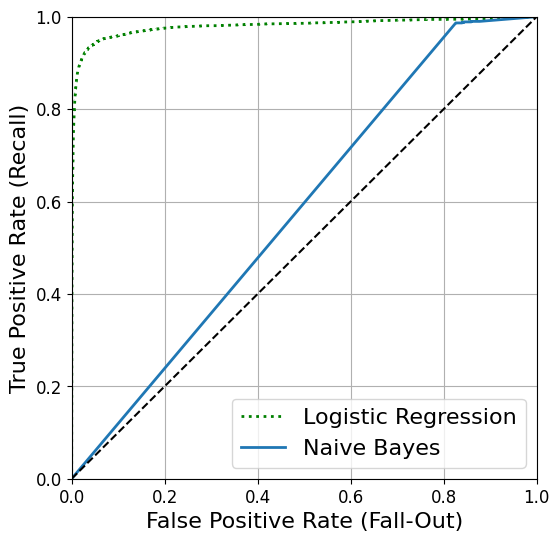

In [46]:
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, "g:", linewidth=2, label="Logistic Regression")
plot_roc_curve(fpr_nb, tpr_nb, "Naive Bayes")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

# Multicalss Classification

In [47]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier

In [48]:
ovo_clf = OneVsOneClassifier(LogisticRegression())
ovo_clf.fit(X_train[:1000], y_train[:1000])
ovo_clf.predict([X_train.iloc[1001]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(


array([7], dtype=uint8)

In [49]:
ovo_clf.decision_function([X_train.iloc[1001]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(


array([[ 1.66888686,  2.66875835,  0.66874363,  4.67360544,  7.33034458,
         6.3273896 , -0.33208589,  9.33247084,  3.67715937,  8.33205581]])

In [50]:
# check number of binary classifiers
len(ovo_clf.estimators_)

45

# Multilabel Classification

In [51]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [52]:
knn_clf.predict([X_test.iloc[-2]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False,  True]])

# Multioutput Classification

In [53]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [54]:
def plot_digit(data):
    image = np.array(data).reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

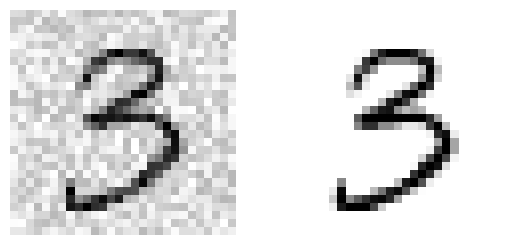

In [55]:
some_index = 2020
plt.subplot(121); plot_digit(X_test_mod.iloc[some_index])
plt.subplot(122); plot_digit(y_test_mod.iloc[some_index])
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


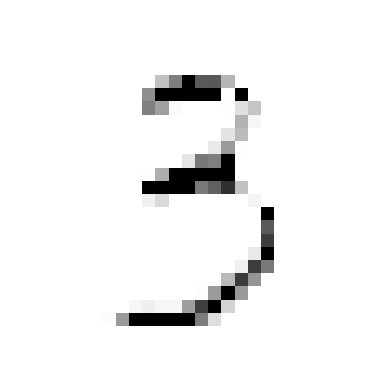

In [56]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod.iloc[some_index]])
plot_digit(clean_digit)